<a href="https://colab.research.google.com/github/shriarul5273/CNN-Keras-Practice/blob/main/Basics/Shallow_CNN_Animals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Key Details 
```
    DataSet: Animals Data (cats,dogs,panda) 
    Deep learning Framework: Tensorflow with Keras
    Deep learning Method: Fully Connected And Convolution
    Optimizer:SGD with 0.01
    Results: 60 to 70 % Accurate
    Total Parameters : 1800003
    Total Convolution Layer : 1
```
Dataset can be seen can be found [here.](https://drive.google.com/drive/folders/1emcr187vPfiXBBg4mYGAzrIshLmrrfU9?usp=sharing)
#### Done by shriarul643@gmail.com

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import all necessary Packages all 


In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import  Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from matplotlib import  pyplot as plt
import numpy as np  
from imutils import paths
import progressbar
import cv2
import pandas as pd



In [3]:
#Path to the Dataset 
PATH_TO_DATASET = '/content/drive/MyDrive/Colab Notebooks/animals'

In [4]:
# list all the images in  dataset 
imagePaths = list(paths.list_images(PATH_TO_DATASET))
print(len(imagePaths))
imagePaths[:5] # check the list

3000


['/content/drive/MyDrive/Colab Notebooks/animals/cats/cats_00038.jpg',
 '/content/drive/MyDrive/Colab Notebooks/animals/cats/cats_00005.jpg',
 '/content/drive/MyDrive/Colab Notebooks/animals/cats/cats_00018.jpg',
 '/content/drive/MyDrive/Colab Notebooks/animals/cats/cats_00008.jpg',
 '/content/drive/MyDrive/Colab Notebooks/animals/cats/cats_00061.jpg']

In [5]:
# initlize the data and labels
data = []
labels = []
np.random.shuffle(imagePaths) # shuffle the list of the images 
imagePaths[:5]

['/content/drive/MyDrive/Colab Notebooks/animals/cats/cats_00522.jpg',
 '/content/drive/MyDrive/Colab Notebooks/animals/panda/panda_00226.jpg',
 '/content/drive/MyDrive/Colab Notebooks/animals/panda/panda_00987.jpg',
 '/content/drive/MyDrive/Colab Notebooks/animals/cats/cats_00575.jpg',
 '/content/drive/MyDrive/Colab Notebooks/animals/panda/panda_00696.jpg']

In [6]:
widgets = ['Loading Images :',progressbar.Bar(),' ',
           progressbar.Percentage(),' ',progressbar.ETA()]
pb = progressbar.ProgressBar(widgets=widgets,max_value=len(imagePaths)).start()
# loop over the image path  and extract image, labels
for i,imagePath in enumerate(imagePaths):
  image = cv2.imread(imagePath)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(100,100)) # Resize the image to 100,100,3
  label = imagePath.split('/')[-2] # extract image labels
  data.append(image)
  labels.append(label)
  pb.update(i+1)
pb.finish()

Loading Images :|#########################################| 100% Time:  0:16:53


In [7]:
data,labels = np.array(data),np.array(labels) # convert list into numpy array
data.shape

(3000, 100, 100, 3)

cats     1000
panda    1000
dogs     1000
Name: l, dtype: int64


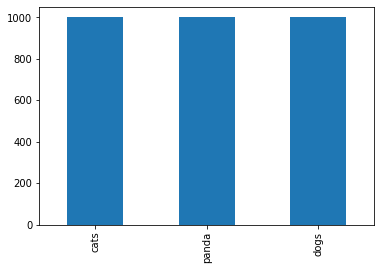

In [8]:
# visulize the labels in number
df = pd.DataFrame({'l':labels})
df['l'].value_counts().plot.bar()
print(df['l'].value_counts())

In [9]:
# split data into trian and test
(trainData,testData,trainLabel,testLabel) = train_test_split(data,
                                                             labels,test_size=0.2)
print(trainData.shape)
print(testData.shape)
print(trainLabel.shape)
print(testLabel.shape)

(2400, 100, 100, 3)
(600, 100, 100, 3)
(2400,)
(600,)


PreProcessing the data.</br>
Transform Label into Binaries of the format [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] </br>

In [10]:
trainData = trainData/255.0
testData =  testData/255.0

le = LabelBinarizer()
trainLabel = le.fit_transform(trainLabel)
testLabel = le.fit_transform(testLabel)

In [11]:
Targetlabels =[x for x in le.classes_]
print(Targetlabels)

['cats', 'dogs', 'panda']


Construct a CNN model with :</br>
INPUT => CONV => RELU => FC as the architecture of the CNN

In [12]:
model = Sequential([Conv2D(60,(5,5),padding='same',input_shape=(100,100,3)),
                    Activation('relu'),
                    Flatten(),
                    Dense(3,activation='softmax')])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 60)      4560      
_________________________________________________________________
activation (Activation)      (None, 100, 100, 60)      0         
_________________________________________________________________
flatten (Flatten)            (None, 600000)            0         
_________________________________________________________________
dense (Dense)                (None, 3)                 1800003   
Total params: 1,804,563
Trainable params: 1,804,563
Non-trainable params: 0
_________________________________________________________________


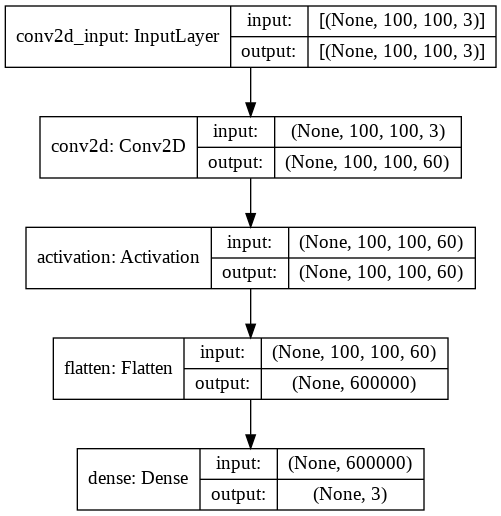

In [14]:
plot_model(model,show_shapes=True)

In [15]:
sgd = SGD(0.01)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [16]:
H = model.fit(trainData,trainLabel,batch_size=32,epochs=25,validation_data=(testData,testLabel))

Epoch 1/25
75/75 [==============================] - 8s 18ms/step - loss: 1.4375 - accuracy: 0.4542 - val_loss: 0.9682 - val_accuracy: 0.4583
Epoch 2/25
75/75 [==============================] - 1s 12ms/step - loss: 0.9234 - accuracy: 0.5464 - val_loss: 0.8384 - val_accuracy: 0.5800
Epoch 3/25
75/75 [==============================] - 1s 12ms/step - loss: 0.7632 - accuracy: 0.6430 - val_loss: 0.7521 - val_accuracy: 0.6200
Epoch 4/25
75/75 [==============================] - 1s 12ms/step - loss: 0.7115 - accuracy: 0.6773 - val_loss: 0.7771 - val_accuracy: 0.5933
Epoch 5/25
75/75 [==============================] - 1s 12ms/step - loss: 0.6764 - accuracy: 0.6938 - val_loss: 0.7207 - val_accuracy: 0.6600
Epoch 6/25
75/75 [==============================] - 1s 12ms/step - loss: 0.6238 - accuracy: 0.7345 - val_loss: 0.6961 - val_accuracy: 0.6350
Epoch 7/25
75/75 [==============================] - 1s 12ms/step - loss: 0.5735 - accuracy: 0.7530 - val_loss: 0.6715 - val_accuracy: 0.6833
Epoch 8/25
75

In [17]:
_,acc = model.evaluate(testData,testLabel)
print('Accuracy is {:.2f}%'.format(acc*100))

19/19 [==============================] - 0s 5ms/step - loss: 0.9186 - accuracy: 0.6650
Accuracy is 66.50%


In [18]:
plt.style.use('ggplot')

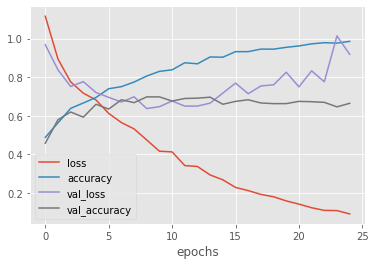

In [19]:
plt.figure()
plt.plot(np.arange(0,25),H.history['loss'],label='loss')
plt.plot(np.arange(0,25),H.history['accuracy'],label='accuracy')
plt.plot(np.arange(0,25),H.history['val_loss'],label='val_loss')
plt.plot(np.arange(0,25),H.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

# The Model is over-fitting because accuracy is very high  when compared with   val_accuracy, val_loss is very high when compared with loss.

In [20]:
predicted = model.predict(testData)

In [21]:
print(classification_report(testLabel.argmax(axis=1),predicted.argmax(axis=1),target_names=Targetlabels))

              precision    recall  f1-score   support

        cats       0.69      0.37      0.48       188
        dogs       0.59      0.69      0.63       209
       panda       0.73      0.92      0.81       203

    accuracy                           0.67       600
   macro avg       0.67      0.66      0.64       600
weighted avg       0.67      0.67      0.65       600



## The pandas has high accuracy,and it is more likely to classsifed correctly.

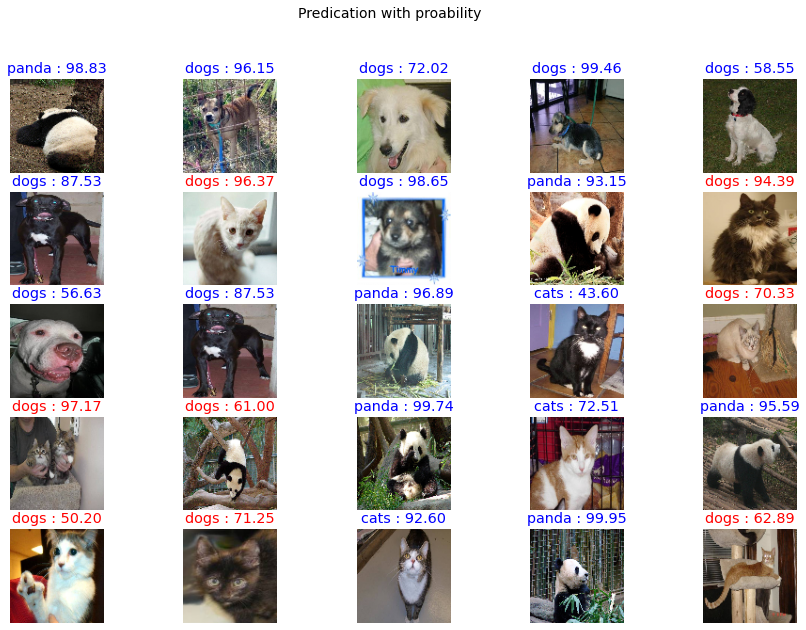

In [23]:
RandomIndex = np.random.randint(0,len(testData),size=(25,))
plt.figure(figsize=(15,10))
for i,j in enumerate(RandomIndex):
  plt.subplot(5,5,i+1)
  plt.imshow(testData[j].reshape(100,100,3),cmap=plt.cm.binary)
  plt.axis('off')
  predictedLabel = np.argmax(predicted[j])
  actualLabel = np.argmax(testLabel[j])
  if predictedLabel == actualLabel:
    color = 'blue'
  else :
    color = 'red'
  plt.title('{} : {:.2f}'.format(Targetlabels[predictedLabel],predicted[j].max()*100),color=color)
plt.suptitle('Predication with proability',fontsize=14)
plt.show()